# Characteristics of Minecraft Players and Subscription to Gaming Newsletters

By Mateo Domínguez De La Llera

In [1]:
library(tidyverse)
library(tidymodels)
#library(tidyclust)
#library(GGally)

#library(lubridate)
library(RColorBrewer)
library(repr)
options(repr.matrix.max.rows = 7)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Introduction

Minecraft is a sandbox (or open-world) videogame released in 2011, and one of the most successful videogames in the world, with over 100 million registered users, making it a perfect source of data for research studies. The [Pacific Laboratory for Artificial Intelligence](https://plai.cs.ubc.ca), a research group based in the Computer Science Department of the University of British Columbia and led by Dr. Frank Wood, set up a Minecraft sever and collected data about players' behavior in the game, along with demographics.
We will use that data to study the characteristics of Minecraft players and whether they subscribe to a game-related newsletter.
Our research question is thus

> **Can the age, gender, experience, and playing time of Minecraft players predict if they will subscribe to a game-related newsletter?**


The outline of the report is as follows. In the rest of the introduction, we give a brief description of the data. For the methods, we read and clean the data to explore the data through summary statistics and visualizations; then, we proceed to build and tune our model, with a subsequent show of the output of our model. Next, we elaborate on our interpretation and reliability of the data in the Discussion, and mention some areas for future research. We make a brief summary and final remarks in the Conclusion.

## Data Description

Our dataset contains 196 observations and 7 variables describing playing behavior (played hours and experience in the game), demographics (Age and gender), and personal information (name and a hashed email). A description of each variable is given in the following table.


| Variable        | Description | Data type  |
|:----------------|:------------------|:----------------|
| experience | Experience of the player in the game | character |
| subscribe | Whether the player subscribed to the newsletter | logical |
| hashedEmail | Encoded or hashed email of the player | character |
| played_hours | Amount of hours played in the server | double |
| name | First name of the player | character |
| gender | Gender of the player | character |
| Age | Age of the player (in years)| double |


Most of the participants were UBC undergraduate students, but details regarding how the data was obtained are unknown to the author of this report.

# Methods

We start by reading and cleaning the data. As showed in our research question, we will not use the variables for personal information (name and hashedEmail) because we are interested in the aggregate behavior of players, so we drop these variables. We also transform variables of character and logical type to factors.

## Exploration of the Dataset


### Reading and Cleaning 

In [2]:
players_raw <- read_csv("https://raw.githubusercontent.com/Mateo-dmngz-D/dsci-100-project/refs/heads/main/players.csv")
players_raw

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


We check whether there is any missing data.

In [3]:
missing_p <- colSums(is.na(players_raw))
missing_p

missing_p_rows <- players_raw |>
    filter(is.na(Age))
missing_p_rows

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Regular,TRUE,7d71c49cbbce8dcf0276b2bfecfa2d16f22cb31a4024556d6085884298f2ee8d,0.1,Devin,Two-Spirited,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Only two observations have missing values, the Age variable in both cases. Since this only represents roughly 1% of the data, we drop these observations to streamline the analysis.

In [4]:
## Clean data
players_clean <- players_raw |>
    mutate(experience = as_factor(experience),
           subscribe = as_factor(subscribe),
           gender = as_factor(gender),
           age = Age) |>
    select(-hashedEmail, -name, -Age) |>
    relocate(played_hours, .after = age) |>
    drop_na()

players_clean

experience,subscribe,gender,age,played_hours
<fct>,<fct>,<fct>,<dbl>,<dbl>
Pro,TRUE,Male,9,30.3
Veteran,TRUE,Male,17,3.8
Veteran,FALSE,Male,17,0.0
Amateur,TRUE,Female,21,0.7
⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,Male,22,0.3
Amateur,FALSE,Prefer not to say,17,0.0
Amateur,FALSE,Male,17,2.3


### Visualizing the Dataset

experience,experience_count,experience_prop
<fct>,<int>,<dbl>
Pro,13,0.06701031
Veteran,48,0.24742268
Amateur,63,0.32474227
Regular,35,0.18041237
Beginner,35,0.18041237


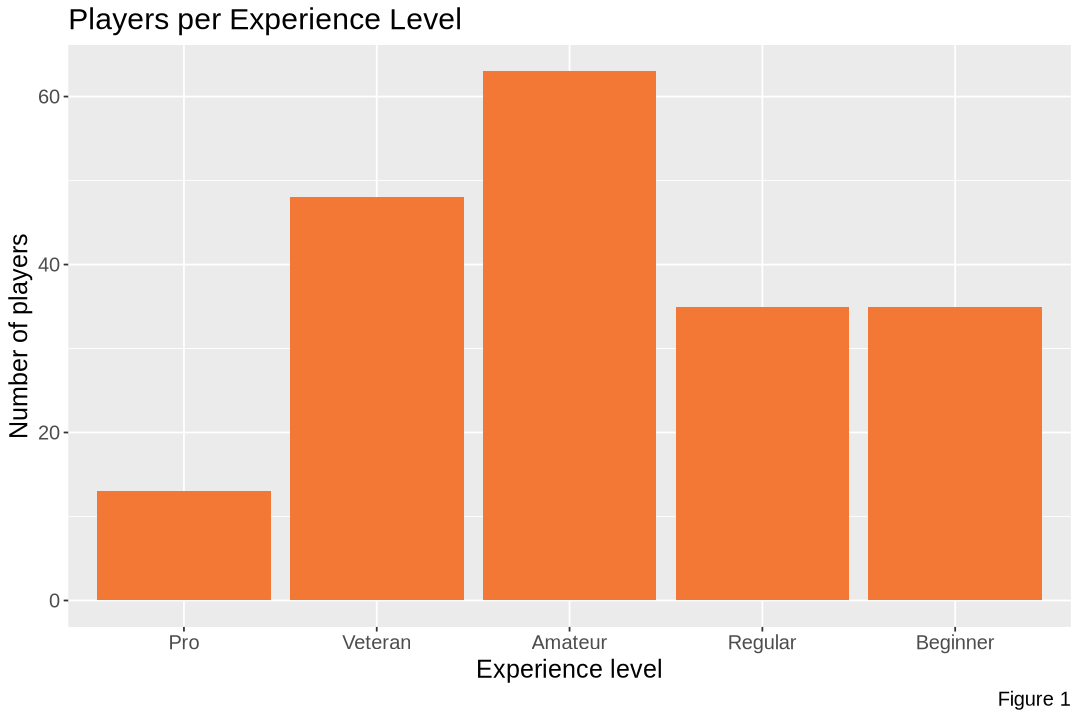

In [5]:
options(repr.plot.width = 9, repr.plot.height = 6)
        
experience_stats <- players_clean |>
    group_by(experience) |>
    summarize(experience_count = n()) |>
    mutate(experience_prop = experience_count / 194)
experience_stats


experience_plot <- experience_stats |>
    ggplot(aes(x = experience, y = experience_count)) +
    geom_bar(stat = "identity", fill = "#f37735") +
    labs(x = "Experience level",
         y = "Number of players",
         title = "Players per Experience Level",
         caption = "Figure 1") +
    theme(text = element_text(size = 15))

experience_plot

Beginner and amateur players make up 50% of the players in the entire server, while Pro players account for only 7.2% of all players. Veteran players are the second lagest group.

gender,gender_count,gender_prop
<fct>,<int>,<dbl>
Male,124,0.63917526
Female,37,0.19072165
Non-binary,15,0.07731959
Prefer not to say,11,0.05670103
Agender,2,0.01030928
Two-Spirited,5,0.02577320


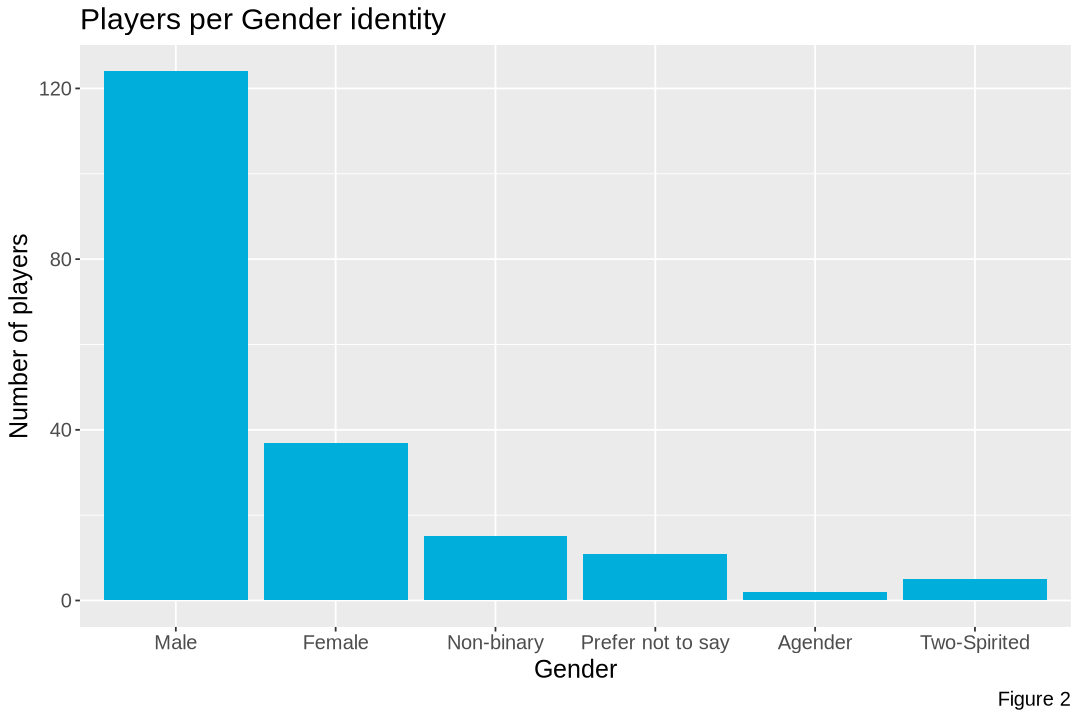

In [6]:
gender_stats <- players_clean |>
    group_by(gender) |>
    summarize(gender_count = n()) |>
    mutate(gender_prop = gender_count / 194)
gender_stats

gender_plot <- gender_stats |>
    ggplot(aes(x = gender, y = gender_count)) +
    geom_bar(stat = "identity", fill = "#00aedb") +
    labs(x = "Gender",
         y = "Number of players",
         title = "Players per Gender identity",
         caption = "Figure 2") +
    theme(text = element_text(size = 15))

gender_plot

Almost two thirds (64%) of players identify as male. Female players are the second-largest group, making up 20% of the population.

subscribe,subs_count,subs_prop
<fct>,<int>,<dbl>
FALSE,52,0.2680412
TRUE,142,0.7319588


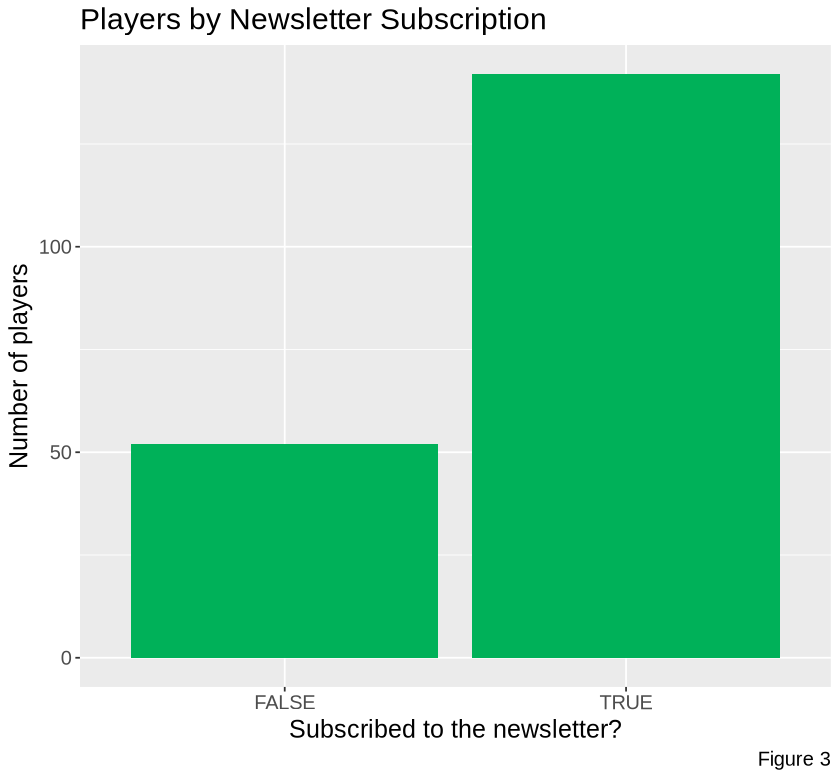

In [7]:
options(repr.plot.width = 7, repr.plot.height = 6.5)

subs_stats <- players_clean |>
    group_by(subscribe) |>
    summarize(subs_count = n()) |>
    mutate(subs_prop = subs_count / 194)
subs_stats

subs_plot <- subs_stats |>
    ggplot(aes(x = subscribe, y = subs_count)) +
    geom_bar(stat = "identity", fill = "#00b159") +
    labs(x = "Subscribed to the newsletter?",
         y = "Number of players",
         title = "Players by Newsletter Subscription",
         caption = "Figure 3") +
    theme(text = element_text(size = 15))

subs_plot

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


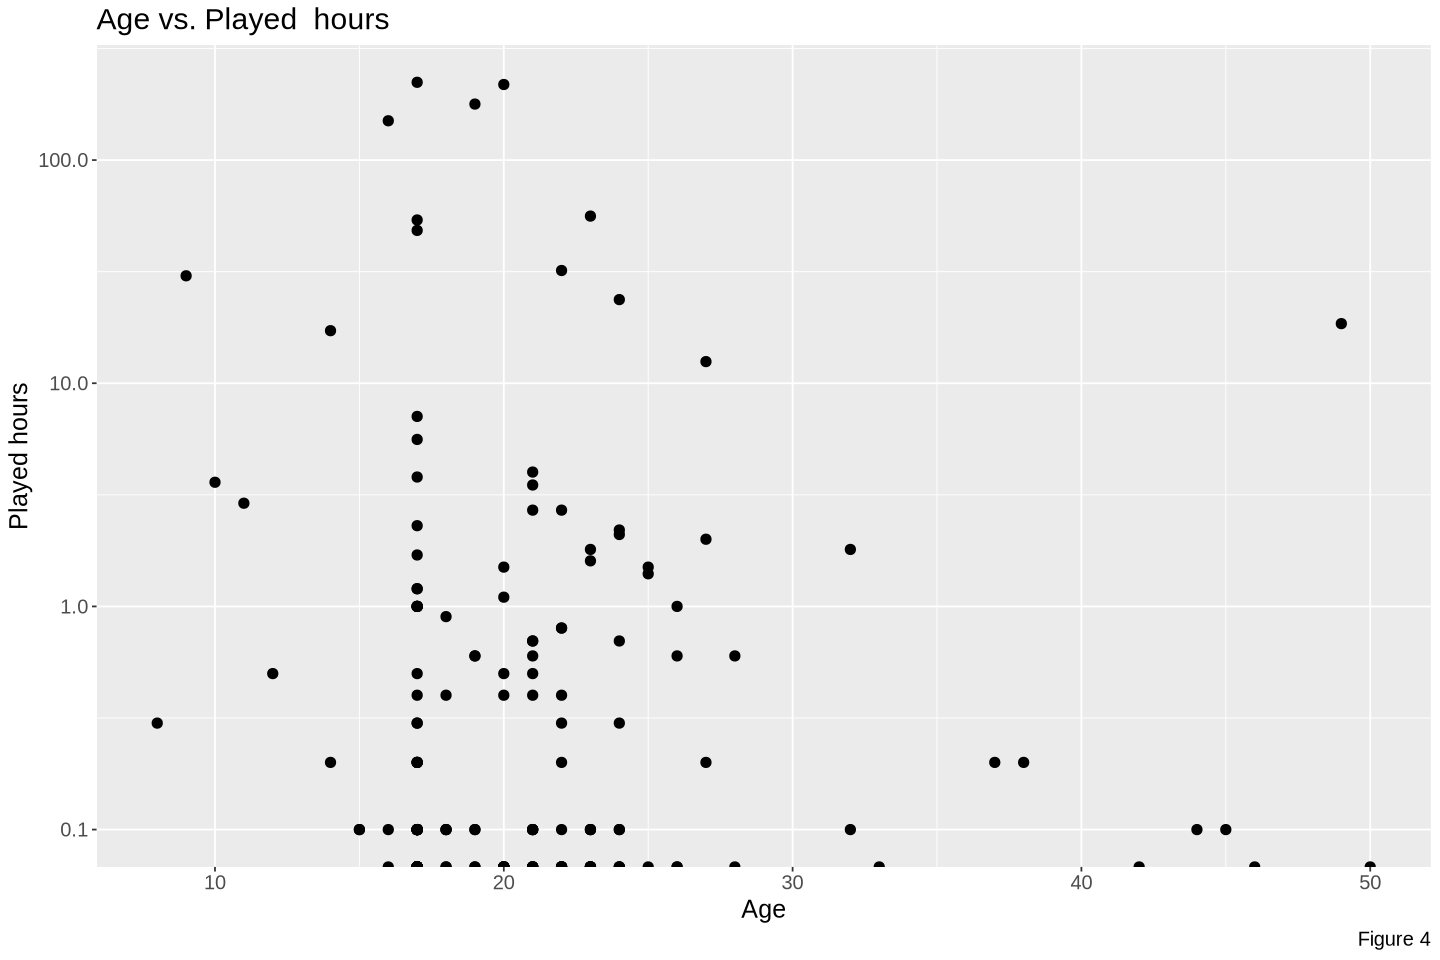

In [8]:
options(repr.plot.width = 12, repr.plot.height = 8)
age_played_plot <- players_clean |>
    select(played_hours, age) |>
    ggplot(aes(x = age, y = played_hours)) +
    geom_point(alpha = 1, size = 2.5) +
    labs(x = "Age",
         y = "Played hours",
         title = "Age vs. Played  hours",
         caption = "Figure 4") +
    scale_y_log10() +
    scale_color_brewer(palette = "Dark2") +
    theme(text = element_text(size = 15))

age_played_plot

We see that a large majority of players are in the 16-25 years old range. It is particularly interesting that about 40% of players are in the 16 or 17 years old.

### Summary Statistics

Now we calculate summary statistics for the age and played_hours variables.

In [9]:
age_stats <- players_clean |>
    summarize(across(age:played_hours,
                     list(min = min, median = median, max = max, average = mean)))# |>
#    pivot_longer(age_min:played_hours_average,
#                 names_to = "statistic",
#                 values_to = "values")
age_stats

age_min,age_median,age_max,age_average,played_hours_min,played_hours_median,played_hours_max,played_hours_average
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,19,50,20.52062,0,0.1,223.1,5.904639


The range of the age for players is quite large, going from 8 to 50 years old; however, given how close the median and average are, the majority of players is in their late teens or early 20s.

The range of played hours is also very large, going up to 223 hours. However, given how low the median is, we suspect that this is an outlier.

## Analysis



We use the K-nearest neighbors (K-nn) algorithm to predict user subscription to the newsletter.

In a nutshell, for each unclassified player, the K-nn algorithm searches for the K most similar players (in terms experience, name, gender and Age), takes the mode of the label of interest (subcription to the newsletter), and assigns it to the unclassified player.

This algorithm requires relatively small datasets, a choice of few predictors, and a balance in the class or label of interest. Considering our dataset contains fewer than 200 observations, our model uses only four predictors, and the 3:1 ratio of newsletter subscriptions, we deem the algorithm to be appropriate for this problem.

As a side note, the author is new to data science, and consequently only knows this method to solve classification problems.

To assess the performance of our model, we must split our dataset into training and testing sets; we do a 75% - 25% split. We later do a 5-fold cross-validation (with stratified data) to account for a possible "unlucky" training set with a large class imbalance, ensuring our model is trained with reliable sets of data.

In [10]:
set.seed(3421)

players <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_training <- training(players)
players_testing <- testing(players)

As required by the K-nn algorithm, we scale and center our numeric predictors.

In [11]:
## Recipe

p1_recipe <- recipe(subscribe ~ ., data = players_training) |>
    step_scale(age, played_hours) |>
    step_center(age, played_hours)

### Tuning

In [12]:
## Model
p1_tuning_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

## Folds
p1_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

## Workflow
p1_workflow <- workflow() |>
    add_recipe(p1_recipe) |>
    add_model(p1_tuning_spec)

In [13]:
## Cross-validation
gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

## Choosing K
p1_results <- p1_workflow |>
    tune_grid(resamples = p1_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy") |>
    as.data.frame() |>
    arrange(desc(mean))
p1_results


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,binary,0.7166502,5,0.03053806,Preprocessor1_Model06
5,accuracy,binary,0.7099836,5,0.02644210,Preprocessor1_Model05
7,accuracy,binary,0.7023645,5,0.02822811,Preprocessor1_Model07
4,accuracy,binary,0.6892611,5,0.01320105,Preprocessor1_Model04
⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,accuracy,binary,0.6683251,5,0.01707264,Preprocessor1_Model03
2,accuracy,binary,0.5926601,5,0.02685344,Preprocessor1_Model02
1,accuracy,binary,0.5719540,5,0.03152570,Preprocessor1_Model01


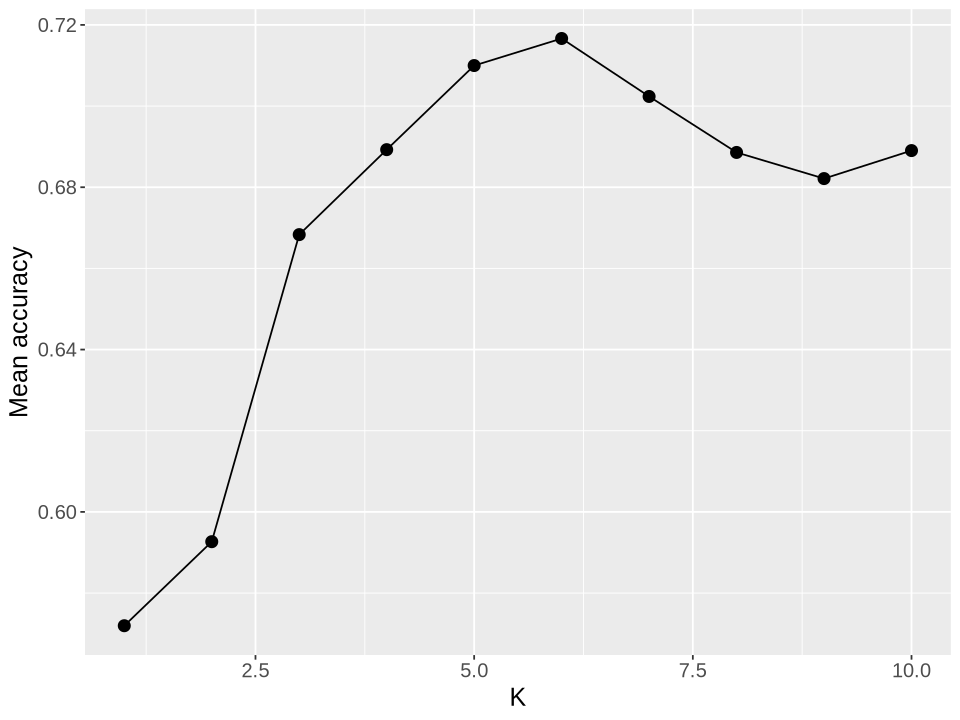

In [14]:
## Choosing k
options(repr.plot.width = 8, repr.plot.height = 6)

p1_k_plot <- p1_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point(size = 3) +
    geom_line() +
    labs(x = "K", y = "Mean accuracy") +
    theme(text = element_text(size = 15))
p1_k_plot

We choose $k = 6$ because it has the largest accuracy estimate, 71.6%. Note that both $k = 5$ and $k = 7$ have close estimates at 71% and 70.2%, respectively. This gives reliability to our choice of $k$ given the uncertainty of the estimates.

In [15]:
p1_best_k <- 6

### Model with best K

In [20]:
## Create model with best K
p1_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = p1_best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

## Workflow
p1_fit <- workflow() |>
    add_recipe(p1_recipe) |>
    add_model(p1_best_spec) |>
    fit(players_training)

## Predict + metrics
p1_accuracy <- p1_fit |>
    predict(players_training) |>
    bind_cols(players_training) |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    select(.estimate) |>
    pull()

p1_accuracy

## Confusion matrix
p1_conf_matrix <- p1_fit |>
    predict(players_training) |>
    bind_cols(players_training) |>
    conf_mat(truth = subscribe, estimate = .pred_class)
p1_conf_matrix

[1] 0.8068966

          Truth
Prediction FALSE TRUE
     FALSE    16    5
     TRUE     23  101

Finally, the accuracy of our model is 80.7%, with a precision of 81.4% and a recall of 95.3%

# Discussion

Our model is fairly good at predicting when a player will subscribe to a gaming-related newsletter, as the accuracy, precision and recall are all above 80%. However, its performance is lower when predicting when a player will *not* subscribe: the precision falls to 76.2% and the recall to 41%. The model thus performed in line with the author's expectations because models with a high accuracy tend to have lower precision or recall values, assuming they are not overfitting to the data.

A deeper analysis could be made on whether any of the predictors played a larger role in this model, and if conditioning on any of the predictors increases the performance of the model.

The author would like to note that there is a lot of missing information regarding the context of the data. For instance, 
* When was the data collected? For how long?
* How was the server advertised? Was it targeted to any particular population?
* How did people access the server?
* How was the non-gaming data (age, gender, and email) collected? Survey? Did researchers collect anything else?




# References

Spinu, Vitalie, Garrett Grolemund, and Hadley Wickham. 2021. lubridate R package. https://lubridate.tidyverse.org/.

Thompson, Clive (14 April 2016). "The Minecraft Generation How a clunky Swedish computer game is teaching millions of children to master the digital world". *The New York Times*. Retrieved 23 June 2025. https://www.nytimes.com/2016/04/17/magazine/the-minecraft-generation.html?_r=0 